# Predicting Diamond Prices

## Phase 1: Data visualisationa and exploration

**Group Name:** Group 5 Demons
<br>
**Group members:** <br>
Nikith Kaluwitharana - S3943409 <br>
Ritish Kandel - S3947204 <br>

## Table of contents
1. [Introduction](#Introduction)
    1. [Dataset Source](#Dataset-Source)
    2. [Dataset Details](#Dataset-Details)
    3. [Dataset Variables](#Dataset-Variables)
    4. [Response Variable](#Response-Variable)
2. [Goals and Objectives](#Goals-and-Objectives)
3. [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
4. [Data Exploration and Visualisation](#Data-Exploration-and-Visualisation)
5. [Summary and Conclusions](#Summary-and-Conclusions)
6. [References](#References)
7. [Literature Review](#Literature-Review)

## Introduction

### Dataset Source
This dataset has been sourced through the github repository of of the R library ggplot2(Wickham, 2022). The dataset showcases the prices of diamonds as data about their structures are altered.

### Dataset Details
The dataset contains 10 columns and 53940 rows. The dataset shows the prices of diamonds given variables such as carat, cut, color, clairty, depth, table, x, y, z and price. The null values have already been removed from the data. 

The csv has been downloaded locally on the same directory as the notebook file. The data is read using pandas read_csv method as seen below. 

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv('diamonds.csv')

In [20]:
#sampling 10 random rows from the dataset
df.sample(10, random_state=10)

,carat,cut,color,clarity,depth,table,x,y,z,price
8018,1.01,Premium,E,SI1,61.7,56.0,6.44,6.39,3.96,4330
1583,0.70,Very Good,D,VS1,60.4,58.0,5.71,5.78,3.47,3008
9138,1.13,Very Good,H,SI2,59.8,59.0,6.75,6.82,4.06,4537
2787,0.76,Ideal,F,VS2,61.0,55.0,5.89,5.92,3.60,3257
52429,0.70,Premium,I,VVS1,61.2,59.0,5.65,5.69,3.47,2513
47228,0.55,Ideal,D,SI1,60.9,57.0,5.29,5.32,3.23,1840
13271,1.00,Fair,G,VS2,63.7,55.0,6.28,6.21,3.98,5484
43309,0.51,Premium,F,VS2,62.7,59.0,5.04,5.07,3.17,1402
5518,1.00,Good,H,SI2,63.4,61.0,6.29,6.33,4.00,3850
47595,0.53,Ideal,D,VS2,60.9,57.0,5.24,5.17,3.17,1877


### Dataset Variables
Description for our dataset has been shown below

In [2]:
%%html
     <table>
        <tr>
            <th>Column Name</th>
            <th>Column Type</th>
            <th>Column Unit</th>
            <th>Column Description</th>
        </tr>
        <tr>
            <th>carat</th>
            <td>Numerical</td>
            <td>weight in carat</td>
            <td>weight of the diamonds in carats</td>
        </tr>
        <tr>
            <th>cut</th>
            <td>Ordinal Categorical</td>
            <td>NA</td>
            <td>cut quality of diamond(fair, good, very good, premium, ideal)</td>
        </tr>
        <tr>
            <th>color</th>
            <td>Ordinal Categorical</td>
            <td>NA</td>
            <td>diamond colour, from J (worst) to D (best)</td>
        </tr>
        
        <tr>
            <th>Clarity</th>
            <td>Ordinal Categorical</td>
            <td>NA</td>
            <td>measurement of how clear the diamond is</td>
        </tr>
        
        <tr>
            <th>Depth</th>
            <td>Numerical</td>
            <td>NA</td>
            <td>total depth percentage</td>
        </tr>
        
        <tr>
            <th>table</th>
            <td>Numerical</td>
            <td>NA</td>
            <td>width of top of diamond relative to widest point</td>
        </tr>
        <tr>
            <th>x</th>
            <td>Numerical</td>
            <td>mm</td>
            <td>length in mm</td>
        </tr>
        <tr>
            <th>y</th>
            <td>Numerical</td>
            <td>mm</td>
            <td>width in mm</td>
        </tr>
        <tr>
            <th>z</th>
            <td>Numerical</td>
            <td>mm</td>
            <td>depth in mm</td>
        </tr>
        <tr>
            <th>price</th>
            <td>Numerical</td>
            <td>$</td>
            <td>cost of diamond</td>
        </tr>
        
    </table>

Column Name,Column Type,Column Unit,Column Description
carat,Numerical,weight in carat,weight of the diamonds in carats
cut,Ordinal Categorical,NA,"cut quality of diamond(fair, good, very good, premium, ideal)"
color,Ordinal Categorical,NA,"diamond colour, from J (worst) to D (best)"
Clarity,Ordinal Categorical,NA,measurement of how clear the diamond is
Depth,Numerical,NA,total depth percentage
table,Numerical,NA,width of top of diamond relative to widest point
x,Numerical,mm,length in mm
y,Numerical,mm,width in mm
z,Numerical,mm,depth in mm
price,Numerical,$,cost of diamond


### Response Variable
The response variable of this analysis will be the price of the diamond. The value is numerical in nature and will be predicted using regression. 

## Goals and Objectives
Diamonds are such a high value item used in jewellery around the world, mainly on rings associated with engagements and marriages. For this reason, jewellers can use a model that describes an accurate image of a diamond so they can market their prices appropriately. Likewise, businesses can also use the predictive model so they can profit off buying and reselling diamonds and creating a mark-up if there is no other precedent. However, most importantly consumers can use this information to avoid getting ripped off and can find a better deal for their jewellery. 

The main objective of this report is to predict the prices of diamonds based on the features of them. As well as to find out what feature of the diamond influences the greatest change in the price of diamonds. 

We also have to make the assumption that each instance in the dataset is not correlated, where the different diamonds’ features should not be dependent on each other. This is easy to assume for diamonds, as each diamond is formed independently, however, the price of the diamonds is not without error as well. 

It is up to the data processing to now remove any unwanted features of the dataset, with any null ID values or constants, removed from the dataset, by doing this, only the relevant information will make it into the multiple linear regression, which can then determine the goals outlined above.

## Data Cleaning and Preprocessing
The process of removing unnessary data from the dataset

### Dataset importation

In [3]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import io
import requests

# all columns
pd.set_option('display.max_columns', None)
# reading csv from github
df = pd.read_csv('diamonds.csv')

Checking to see if the dataset loaded in without issues

In [4]:
df.shape

(53940, 10)

We will now print the names of the columns in this dataset

In [5]:
df.columns.to_list()

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'price']

We will now look at 10 randomly selected rows from this dataset

In [6]:
df.iloc[:, :].sample(n=10, random_state=8)

,carat,cut,color,clarity,depth,table,x,y,z,price
43149,0.56,Fair,E,SI2,64.5,61.0,5.18,5.14,3.33,1389
50113,0.51,Ideal,E,VVS2,61.7,57.0,5.11,5.14,3.16,2209
49263,0.70,Good,H,SI1,61.9,62.0,5.57,5.61,3.46,2088
9661,1.01,Ideal,H,SI1,62.4,53.0,6.47,6.42,4.02,4642
8500,1.12,Ideal,J,VS2,60.1,57.0,6.82,6.75,4.08,4422
47400,0.53,Ideal,H,VS1,60.8,57.0,5.24,5.29,3.20,1848
27241,1.74,Premium,G,VS2,61.0,58.0,7.77,7.75,4.73,17614
21447,1.11,Premium,F,VVS2,59.2,59.0,6.82,6.79,4.03,9548
1212,0.73,Very Good,F,VS2,62.7,58.0,5.73,5.75,3.60,2939
36916,0.41,Premium,G,VS1,60.2,59.0,4.84,4.79,2.90,961


### Cleaning and Preprocessing

No ID values to remove, removing constant features due to it being irrelevant to machine learning

In [7]:
df = df.loc[:, df.nunique() != 1]

Checking for missing or null values

In [8]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

No missing or null values, no need to drop any rows

## Data Exploration and Visualisation


Frequency graph of different quality cuts of diamonds present in teh dataset

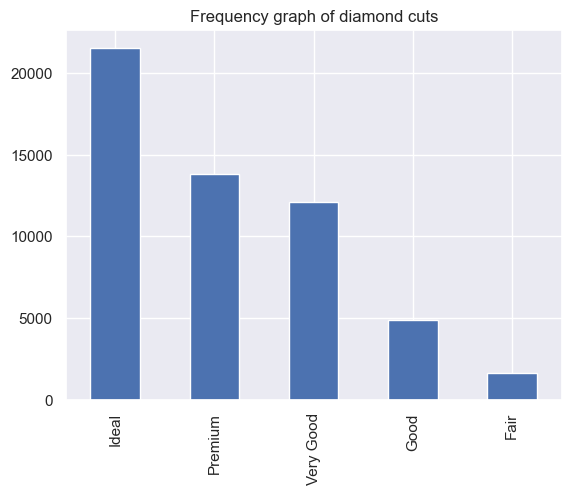

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
df['cut'].value_counts().plot(kind='bar')
plt.title("Frequency graph of diamond cuts")
plt.show()


From the frequency graph, it can be seen that the ideal cut is the most commo with fair being the least. Our model might have a more accurate price prediction of ideal cuts of diamonds than the fair cuts. 

___

Visualisation of weight of diamond as box plot

Text(0.5, 1.0, 'Box Plot of weight of diamond')

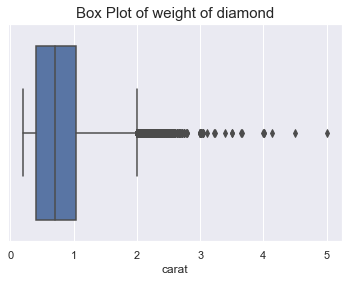

In [6]:
priceData = df['carat']
sns.set_theme()
sns.boxplot(x = priceData).set_title('Box Plot of weight of diamond', fontsize = 15)

The box plot shows that the weight of the diamond is very scattered with the amount of outliers present. This is good for modelling as it allows us to make accurate predictions for a range of different weights. 

___

Visualisation of carat vs price

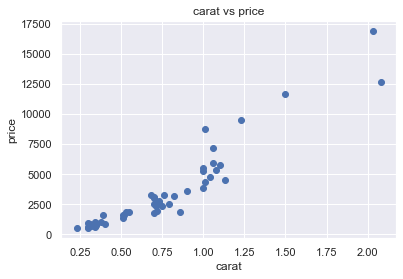

In [7]:
carat = list(df['carat'].sample(n=50, random_state=10))
price = list(df['price'].sample(n=50, random_state=10))
sns.set_theme()
plt.title("carat vs price")
plt.xlabel("carat")
plt.ylabel("price")
plt.scatter(carat, price)
plt.show()

Fifty random sample of both carat and price have been taken using the same seed to visualise the relationship. From the relationship, it can be deducted that as the weight of the diamond increases the price also increases. Only fifty random samples were taken because the relationship was hard to visualise when all of the data was graphed. 
<hr>

Representation of carat vs price with clarity colour coded

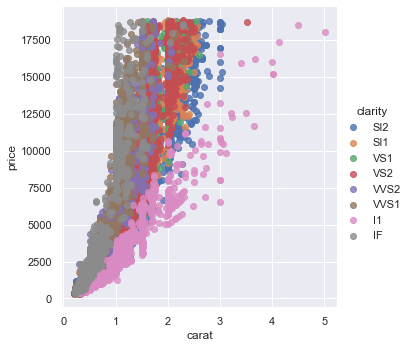

In [8]:
sns.set_theme()
sns.lmplot(x ='carat', y ='price', data = df, fit_reg = False, hue = 'clarity',)

<hr>

Much clearer distinction between price amongst different clarity

<AxesSubplot:xlabel='clarity', ylabel='price'>

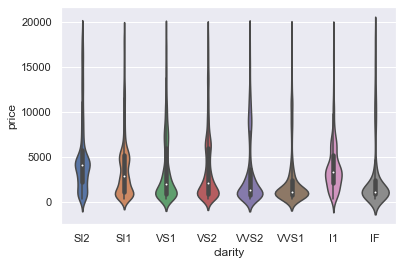

In [9]:
sns.set_style()
sns.violinplot(x='clarity', y='price', data=df)

<hr>

Another representation of the effects of clarity on price

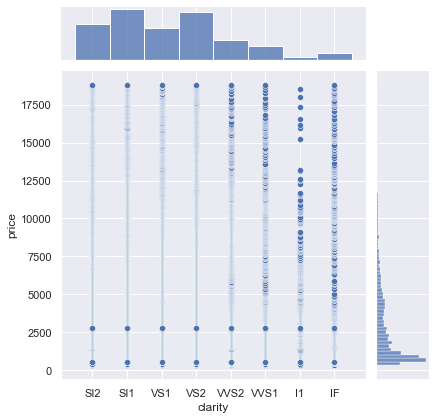

In [13]:
sns.jointplot(x='clarity', y='price', data=df)

<hr>

<hr>

In [18]:
color = df['color']
price = df['price']
plt.bar(color, price)


G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

## Summary and Conclusions
Lorem ipsum dolor sit amet consectetur adipiscing elit, urna consequat felis vehicula class ultricies mollis dictumst, aenean non a in donec nulla. Phasellus ante pellentesque erat cum risus consequat imperdiet aliquam, integer placerat et turpis mi eros nec lobortis taciti, vehicula nisl litora tellus ligula porttitor metus

## Literature Review
Lorem ipsum dolor sit amet consectetur adipiscing elit, urna consequat felis vehicula class ultricies mollis dictumst, aenean non a in donec nulla. Phasellus ante pellentesque erat cum risus consequat imperdiet aliquam, integer placerat et turpis mi eros nec lobortis taciti, vehicula nisl litora tellus ligula porttitor metus

## References
Wickham, H., 2022. ggplot2/diamonds.csv at main · tidyverse/ggplot2. [online] GitHub. Available at: <https://github.com/tidyverse/ggplot2/blob/main/data-raw/diamonds.csv> [Accessed 2 October 2022].